# Load libraries

In [1]:
import os
import re
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.6) #for label size

from scipy.signal import savgol_filter, find_peaks

# Load data

Insert name of folder containing data_files and scripts here

In [3]:
folder = ''

In [4]:
data_path = Path(folder)

data_files = 'Data_files'
data_files_path = data_path / data_files

In [5]:
KMeans_data_folder = 'Data_classification_results/KMeans data'
KMeans_data_path = data_path / KMeans_data_folder

### Set results path

In [6]:
# Change the current working directory to the results_path
results_folder = 'Data_classification_results/Data pre-treatment'
results_path = data_path / results_folder
results_path.mkdir(parents=True, exist_ok = True)
os.chdir(results_path)

### Set ID dictionaries

In [79]:
class_dict = { 
    '#000000' : 'Soil', 
    1 : 'Soil',
    '#cc0066' : 'Interface',
    2 : 'Interface',
    '#ffcc00' : 'Root',
    3 : 'Root'
}

In [80]:
def process_SAM_data(df, name):
    
    global SAM_data
    
    df['Species'] = name
    df['Class'] = df['Color'].map(class_dict)
    
    df.drop(['Name', 'Color', 'x', 'y'], axis=1, inplace=True)
    df.set_index(['Species', 'Class'], inplace = True)
    
    return df

In [81]:
SAM_data = pd.DataFrame()

files = [x for x in data_files_path.iterdir() if x.suffix == '.csv' and x.stem.endswith('_spectra')]
for file in files:
    name = " ".join(re.findall('(.*?)\_spectra', file.stem))
    
    try:
        data = pd.read_csv(file)
    except Exception as e:
        print(f"Error while loading data from '{file}': {e}")
        
    data = process_SAM_data(data, name)
    SAM_data = pd.concat([SAM_data, data])
    
SAM_data.reset_index(inplace = True)
SAM_data['Class'] = pd.Categorical(SAM_data['Class'], ['Root', 'Interface', 'Soil'])
SAM_data = SAM_data.sort_values(by = 'Class')
SAM_data.set_index(['Species', 'Class'], inplace = True)

In [82]:
SAM_data.head()

,,470,472.886,475.772,478.658,481.544,484.43,487.315,490.201,493.087,495.973,...,874.027,876.913,879.799,882.685,885.57,888.456,891.342,894.228,897.114,900
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.400600,0.400066,0.397321,0.397773,0.400189,0.401096,0.401948,0.403271,0.405390,0.408943,...,0.606570,0.606778,0.606837,0.606485,0.605296,0.604206,0.603084,0.601925,0.601448,0.601448
D2,Root,0.273213,0.274070,0.266876,0.265867,0.270100,0.272382,0.270865,0.268235,0.268315,0.272355,...,0.431357,0.432165,0.431305,0.430819,0.430092,0.429470,0.429070,0.428643,0.428831,0.428831
A2,Interface,0.133512,0.131641,0.129174,0.127447,0.127737,0.129942,0.130353,0.130905,0.130405,0.128715,...,0.244789,0.246334,0.247955,0.249455,0.250726,0.251814,0.253177,0.254013,0.254147,0.254147
D2,Interface,0.095626,0.096535,0.098657,0.096353,0.093454,0.093934,0.093043,0.094957,0.095250,0.094051,...,0.175172,0.176297,0.177316,0.179030,0.180048,0.181417,0.182853,0.183517,0.183943,0.183943
A2,Soil,0.051160,0.051872,0.050348,0.048137,0.045779,0.045200,0.048987,0.046796,0.044804,0.041832,...,0.148951,0.150829,0.152748,0.154875,0.156711,0.158552,0.160454,0.162405,0.163231,0.163231


In [83]:
kmeans_file = [x for x in KMeans_data_path.iterdir() if x.suffix == '.xlsx' and x.stem.startswith('kmeans')]

if kmeans_file:
    kmeans_data = pd.read_excel(kmeans_file[0], index_col = [0, 1])
    kmeans_data.reset_index(inplace = True)
    kmeans_data['Class'] = kmeans_data['Class'].map(class_dict)
    kmeans_data['Class'] = pd.Categorical(kmeans_data['Class'], ['Root', 'Interface', 'Soil'])
    kmeans_data = kmeans_data.sort_values(by = 'Class')
    
    kmeans_data.set_index(['Species', 'Class'], inplace = True)
else:
    print("No valid kmeans file found.")

In [84]:
kmeans_data.head()

,,470.000000,472.885906,475.771812,478.657718,481.543624,484.429530,487.315436,490.201342,493.087248,495.973154,...,874.026846,876.912752,879.798658,882.684564,885.570470,888.456376,891.342282,894.228188,897.114094,900.000000
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.323643,0.323930,0.320425,0.318705,0.319375,0.321596,0.324095,0.324095,0.324723,0.326374,...,0.532199,0.532583,0.532808,0.532669,0.532146,0.531469,0.530619,0.530017,0.529852,0.529852
D2,Root,0.183949,0.184184,0.181188,0.179525,0.179744,0.181277,0.182725,0.181675,0.181109,0.181140,...,0.350809,0.351890,0.352825,0.353542,0.353946,0.354262,0.354422,0.354926,0.355201,0.355201
A2,Interface,0.153077,0.153369,0.151087,0.149361,0.148657,0.149288,0.151144,0.150332,0.149569,0.148828,...,0.312734,0.314156,0.315511,0.316741,0.317716,0.318706,0.319530,0.320536,0.321034,0.321034
D2,Interface,0.052583,0.052743,0.050775,0.048993,0.048145,0.049030,0.050414,0.048865,0.047481,0.046036,...,0.173969,0.176027,0.178144,0.180264,0.182202,0.184132,0.185810,0.187686,0.188546,0.188546
A2,Soil,0.061338,0.061254,0.059574,0.058025,0.056806,0.056754,0.058234,0.056709,0.055121,0.053163,...,0.158653,0.160488,0.162443,0.164511,0.166369,0.168284,0.170045,0.171925,0.172775,0.172775


### Set wavelength variable

In [85]:
wl = np.array([float(wavelength) for wavelength in SAM_data.columns])
wl

array([470.   , 472.886, 475.772, 478.658, 481.544, 484.43 , 487.315,
       490.201, 493.087, 495.973, 498.859, 501.745, 504.631, 507.517,
       510.403, 513.289, 516.174, 519.06 , 521.946, 524.832, 527.718,
       530.604, 533.49 , 536.376, 539.262, 542.148, 545.034, 547.919,
       550.805, 553.691, 556.577, 559.463, 562.349, 565.235, 568.121,
       571.007, 573.893, 576.779, 579.664, 582.55 , 585.436, 588.322,
       591.208, 594.094, 596.98 , 599.866, 602.752, 605.638, 608.523,
       611.409, 614.295, 617.181, 620.067, 622.953, 625.839, 628.725,
       631.611, 634.497, 637.383, 640.268, 643.154, 646.04 , 648.926,
       651.812, 654.698, 657.584, 660.47 , 663.356, 666.242, 669.128,
       672.013, 674.899, 677.785, 680.671, 683.557, 686.443, 689.329,
       692.215, 695.101, 697.987, 700.872, 703.758, 706.644, 709.53 ,
       712.416, 715.302, 718.188, 721.074, 723.96 , 726.846, 729.732,
       732.617, 735.503, 738.389, 741.275, 744.161, 747.047, 749.933,
       752.819, 755.

### Plot all original spectra by species

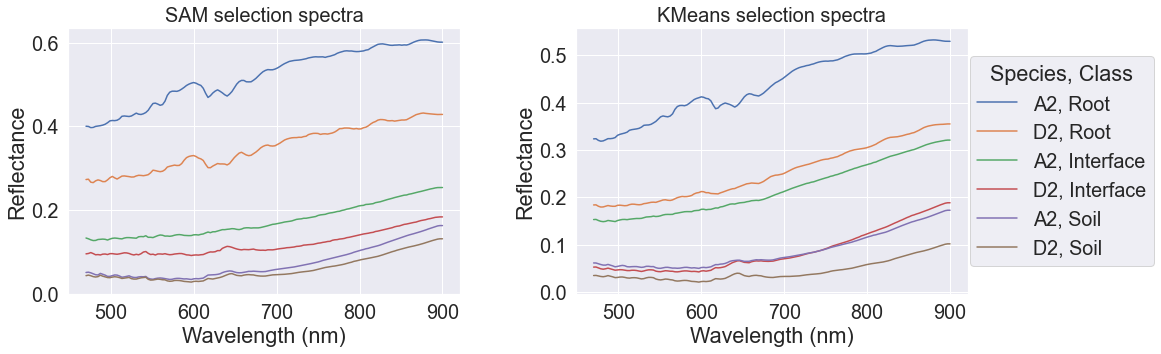

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.tight_layout(pad = 3.0) 

ax[0].plot(wl, SAM_data.values.T)

ax[0].set_title('SAM selection spectra', fontsize = '20')
ax[0].set_ylabel('Reflectance')
ax[0].set_xlabel('Wavelength (nm)')

ax[1].plot(wl, kmeans_data.values.T)

ax[1].set_title('KMeans selection spectra', fontsize = '20')
ax[1].set_ylabel('Reflectance')
ax[1].set_xlabel('Wavelength (nm)')

legend_handles = SAM_data.reset_index()[['Species', 'Class']].astype(str).apply(', '.join, axis=1).tolist()
plt.legend(legend_handles, title = 'Species, Class', loc = 'center right', bbox_to_anchor = (1.5, 0.5))

plt.savefig('Selection_spectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Run Savitzky-Golay smoothing and get second derivatives

In [87]:
width = 21 # Width of selection window
poly = 2 # Order of polynomial

In [88]:
SAM_data.head()

,,470,472.886,475.772,478.658,481.544,484.43,487.315,490.201,493.087,495.973,...,874.027,876.913,879.799,882.685,885.57,888.456,891.342,894.228,897.114,900
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.400600,0.400066,0.397321,0.397773,0.400189,0.401096,0.401948,0.403271,0.405390,0.408943,...,0.606570,0.606778,0.606837,0.606485,0.605296,0.604206,0.603084,0.601925,0.601448,0.601448
D2,Root,0.273213,0.274070,0.266876,0.265867,0.270100,0.272382,0.270865,0.268235,0.268315,0.272355,...,0.431357,0.432165,0.431305,0.430819,0.430092,0.429470,0.429070,0.428643,0.428831,0.428831
A2,Interface,0.133512,0.131641,0.129174,0.127447,0.127737,0.129942,0.130353,0.130905,0.130405,0.128715,...,0.244789,0.246334,0.247955,0.249455,0.250726,0.251814,0.253177,0.254013,0.254147,0.254147
D2,Interface,0.095626,0.096535,0.098657,0.096353,0.093454,0.093934,0.093043,0.094957,0.095250,0.094051,...,0.175172,0.176297,0.177316,0.179030,0.180048,0.181417,0.182853,0.183517,0.183943,0.183943
A2,Soil,0.051160,0.051872,0.050348,0.048137,0.045779,0.045200,0.048987,0.046796,0.044804,0.041832,...,0.148951,0.150829,0.152748,0.154875,0.156711,0.158552,0.160454,0.162405,0.163231,0.163231


In [89]:
kmeans_data.head()

,,470.000000,472.885906,475.771812,478.657718,481.543624,484.429530,487.315436,490.201342,493.087248,495.973154,...,874.026846,876.912752,879.798658,882.684564,885.570470,888.456376,891.342282,894.228188,897.114094,900.000000
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.323643,0.323930,0.320425,0.318705,0.319375,0.321596,0.324095,0.324095,0.324723,0.326374,...,0.532199,0.532583,0.532808,0.532669,0.532146,0.531469,0.530619,0.530017,0.529852,0.529852
D2,Root,0.183949,0.184184,0.181188,0.179525,0.179744,0.181277,0.182725,0.181675,0.181109,0.181140,...,0.350809,0.351890,0.352825,0.353542,0.353946,0.354262,0.354422,0.354926,0.355201,0.355201
A2,Interface,0.153077,0.153369,0.151087,0.149361,0.148657,0.149288,0.151144,0.150332,0.149569,0.148828,...,0.312734,0.314156,0.315511,0.316741,0.317716,0.318706,0.319530,0.320536,0.321034,0.321034
D2,Interface,0.052583,0.052743,0.050775,0.048993,0.048145,0.049030,0.050414,0.048865,0.047481,0.046036,...,0.173969,0.176027,0.178144,0.180264,0.182202,0.184132,0.185810,0.187686,0.188546,0.188546
A2,Soil,0.061338,0.061254,0.059574,0.058025,0.056806,0.056754,0.058234,0.056709,0.055121,0.053163,...,0.158653,0.160488,0.162443,0.164511,0.166369,0.168284,0.170045,0.171925,0.172775,0.172775


In [90]:
SAM_second_drv  = savgol_filter(SAM_data.values, width, polyorder = poly, deriv = 2) 
SAM_second_drv_df = pd.DataFrame(SAM_second_drv, index = SAM_data.index, columns = SAM_data.columns)

In [91]:
kmeans_second_drv  = savgol_filter(kmeans_data.values, width, polyorder = poly, deriv = 2)
kmeans_second_drv_df = pd.DataFrame(kmeans_second_drv, index = kmeans_data.index, columns = kmeans_data.columns)

In [92]:
root_SAM_second_drv = SAM_second_drv_df[SAM_second_drv_df.index.get_level_values(1) == 'Root']
root_kmeans_second_drv = kmeans_second_drv_df[kmeans_second_drv_df.index.get_level_values(1) == 'Root']

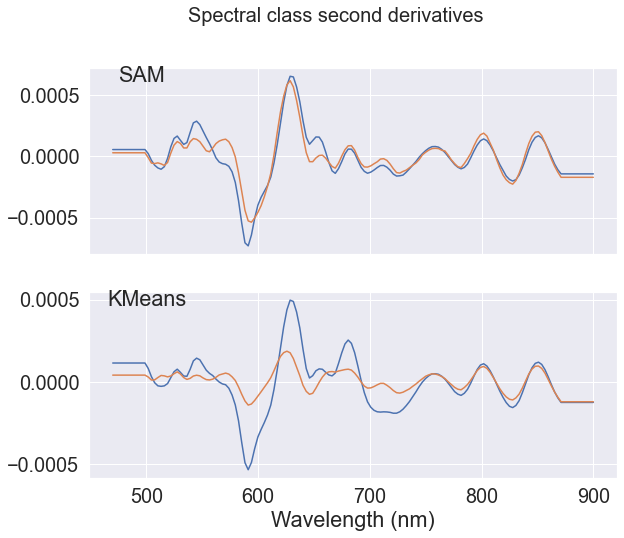

In [93]:
fig, ax = plt.subplots(2,1, figsize = (10, 8), sharex = True)
fig.tight_layout(pad = 3.0) #rect = [0.05, 0.005, 1, 0.95]
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.suptitle('Spectral class second derivatives', fontsize = '20')

ax[0].plot(wl, root_SAM_second_drv.values.T)
ax[0].set_title('SAM', y = 1.0, x = 0.1, pad = -14)
             
ax[1].plot(wl, root_kmeans_second_drv.values.T)
ax[1].set_title('KMeans', y = 1.0, x = 0.11, pad = -14)
ax[1].set(xlabel='Wavelength (nm)')    

plt.savefig('Root_data_second_derivatives.png', dpi=300, bbox_inches='tight')
plt.show()

### SAM informative bands

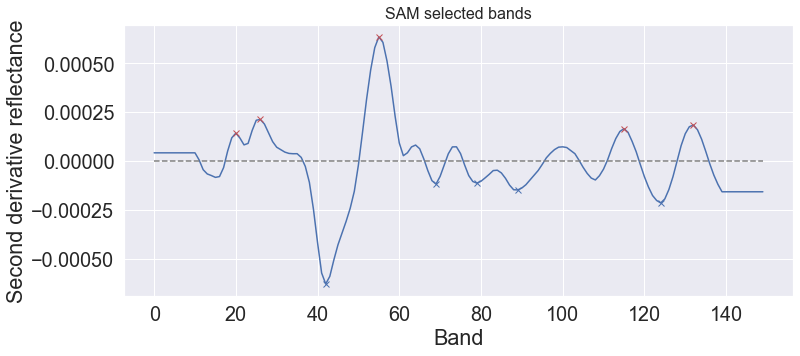

In [94]:
root_SAM_avg_data = root_SAM_second_drv.mean().values.T

fig, ax = plt.subplots(1,1, figsize = (12, 5))
peaks, _ = find_peaks(root_SAM_avg_data, height = 0.0001)
troughs, _ = find_peaks(-root_SAM_avg_data, height = 0.0001) #
plt.plot(root_SAM_avg_data)
plt.plot(peaks, root_SAM_avg_data[peaks], 'x', color = 'r')
plt.plot(troughs, root_SAM_avg_data[troughs], 'x', color = 'b')
plt.plot(np.zeros_like(root_SAM_avg_data), '--', color = 'gray')
plt.title('SAM selected bands', fontsize = '16')
plt.xlabel('Band')
plt.ylabel('Second derivative reflectance')
# plt.savefig('Root_SAM_selected_bands.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [95]:
selected_wl = wl[np.concatenate((peaks, troughs))]
for i in range(0, len(selected_wl)):
    for j in range(i+1, len(selected_wl)):
        if(selected_wl[i] > selected_wl[j]):
            temp = selected_wl[i];
            selected_wl[i] = selected_wl[j];
            selected_wl[j] = temp;
            
selected_wl = selected_wl.astype('int64')
selected_wl_df = pd.DataFrame(selected_wl)
selected_wl_df.to_csv('SAM_selected_wavelengths.csv', index = False)
selected_wl 

array([527, 545, 591, 628, 669, 697, 726, 801, 827, 850], dtype=int64)

In [96]:
bands = np.concatenate((peaks, troughs))
for i in range(0, len(bands)):
    for j in range(i+1, len(bands)):
        if(bands[i] > bands[j]):
            temp = bands[i];
            bands[i] = bands[j];
            bands[j] = temp;
bands = bands.astype(str)
bands = np.array(['band' + s for s in bands])
bands_df = pd.DataFrame(bands)

bands_df.to_csv('SAM_selected_bands.csv', index = False)
bands

array(['band20', 'band26', 'band42', 'band55', 'band69', 'band79',
       'band89', 'band115', 'band124', 'band132'], dtype='<U7')

In [97]:
root_SAM_second_drv.head()

,,470,472.886,475.772,478.658,481.544,484.43,487.315,490.201,493.087,495.973,...,874.027,876.913,879.799,882.685,885.57,888.456,891.342,894.228,897.114,900
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,...,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143,-0.000143
D2,Root,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,0.000029,...,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171,-0.000171


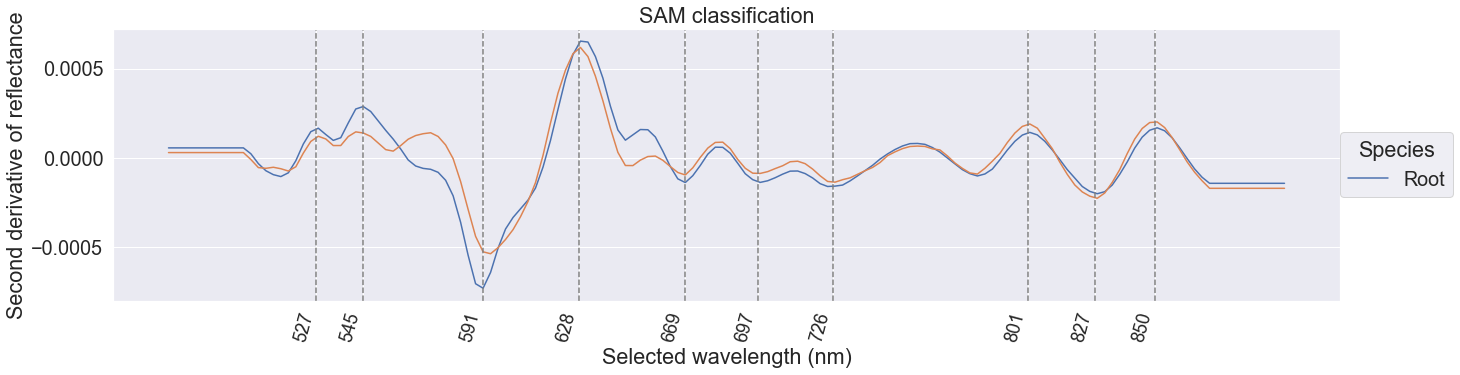

In [98]:
species_labels = root_SAM_second_drv.index.get_level_values(1).unique()

fig, ax = plt.subplots( figsize = (22,5))

sns.set(font_scale = 1.8)

plt.title('SAM classification')

plt.plot(wl, root_SAM_second_drv.values.T)
for x in selected_wl:
    plt.axvline(x, color = 'gray', ls = '--')

ax.set_xticks(selected_wl)
ax.set_xticklabels([f'{x}' for x in selected_wl], rotation=75, ha='right', fontsize=18)

plt.xlabel('Selected wavelength (nm)')
plt.ylabel('Second derivative of reflectance')

plt.legend(species_labels, title = 'Species', loc = 'center right', bbox_to_anchor = (1.1, 0.5))

plt.savefig('Selected_wavelengths_SAM_rootspectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### KMeans informative bands

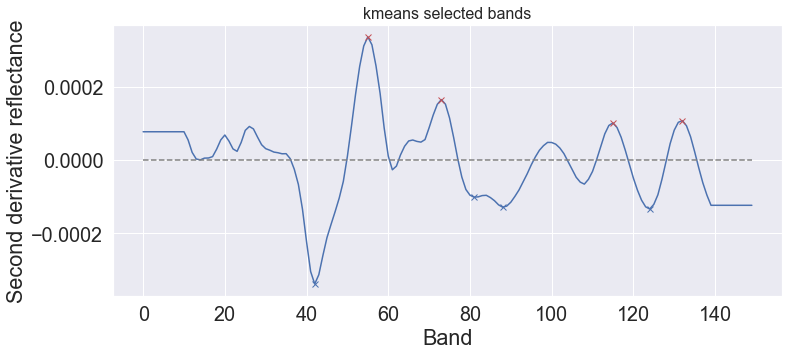

In [99]:
root_kmeans_avg_data = root_kmeans_second_drv.mean().values.T

fig, ax = plt.subplots(1,1, figsize = (12, 5))
peaks, _ = find_peaks(root_kmeans_avg_data, height = 0.0001)
troughs, _ = find_peaks(-root_kmeans_avg_data, height = 0.0001)
plt.plot(root_kmeans_avg_data)
plt.plot(peaks, root_kmeans_avg_data[peaks], 'x', color = 'r')
plt.plot(troughs, root_kmeans_avg_data[troughs], 'x', color = 'b')
plt.plot(np.zeros_like(root_kmeans_avg_data), '--', color = 'gray')
plt.title('kmeans selected bands', fontsize = '16')
plt.xlabel('Band')
plt.ylabel('Second derivative reflectance')
plt.savefig('Root_kmeans_selected_bands.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [100]:
selected_wl = wl[np.concatenate((peaks, troughs))]
for i in range(0, len(selected_wl)):
    for j in range(i+1, len(selected_wl)):
        if(selected_wl[i] > selected_wl[j]):
            temp = selected_wl[i];
            selected_wl[i] = selected_wl[j];
            selected_wl[j] = temp;
            
selected_wl = selected_wl.astype('int64')
selected_wl_df = pd.DataFrame(selected_wl)
selected_wl_df.to_csv('kmeans_selected_wavelengths.csv', index = False)
selected_wl 

array([591, 628, 680, 703, 723, 801, 827, 850], dtype=int64)

In [101]:
bands = np.concatenate((peaks, troughs))
for i in range(0, len(bands)):
    for j in range(i+1, len(bands)):
        if(bands[i] > bands[j]):
            temp = bands[i];
            bands[i] = bands[j];
            bands[j] = temp;
bands = bands.astype(str)
bands = np.array(['band' + s for s in bands])
bands_df = pd.DataFrame(bands)

bands_df.to_csv('kmeans_selected_bands.csv', index = False)
bands

array(['band42', 'band55', 'band73', 'band81', 'band88', 'band115',
       'band124', 'band132'], dtype='<U7')

In [102]:
root_kmeans_second_drv.head()

,,470.000000,472.885906,475.771812,478.657718,481.543624,484.429530,487.315436,490.201342,493.087248,495.973154,...,874.026846,876.912752,879.798658,882.684564,885.570470,888.456376,891.342282,894.228188,897.114094,900.000000
Species,Class,,,,,,,,,,,,,,,,,,,,,
A2,Root,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,...,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125
D2,Root,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,...,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121,-0.000121


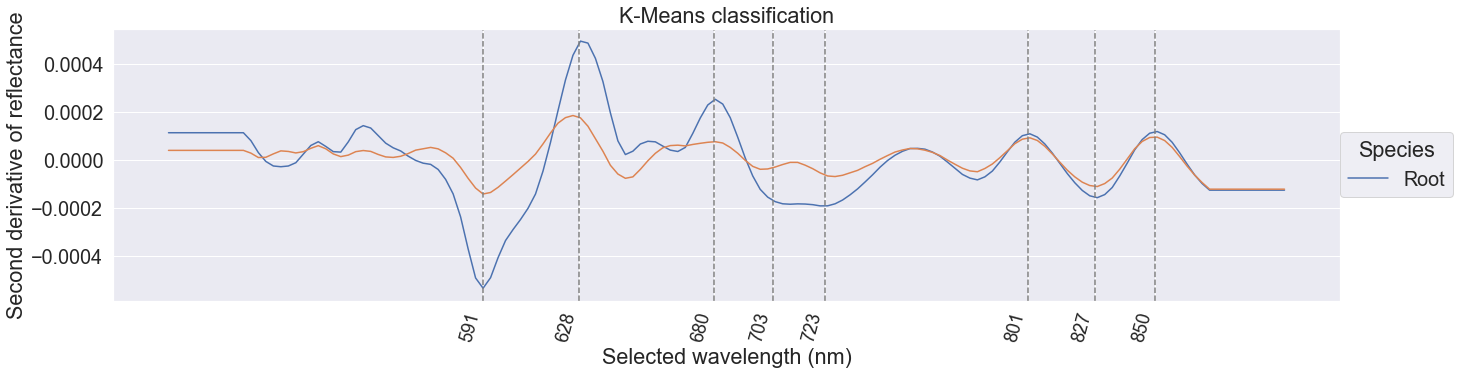

In [103]:
species_labels = root_kmeans_second_drv.index.get_level_values(1).unique()

fig, ax = plt.subplots( figsize = (22,5))
plt.title('K-Means classification')
plt.plot(wl, root_kmeans_second_drv.values.T)
for x in selected_wl:
    plt.axvline(x, color = 'gray', ls = '--')
    
ax.set_xticks(selected_wl)
ax.set_xticklabels([f'{x}' for x in selected_wl], rotation=75, ha='right', fontsize=18)

plt.xlabel('Selected wavelength (nm)')
plt.ylabel('Second derivative of reflectance')

plt.legend(species_labels, title = 'Species', loc = 'center right', bbox_to_anchor = (1.1, 0.5))

plt.savefig('Selected_wavelengths_kmans_rootspectra.png', dpi = 300, bbox_inches = 'tight')
plt.show()